![Logit Title](images/classification_metrics_title.png)

✏️ We have learned how to train a logistic regression model to solve classification problems.  
Now, we will get acquainted with **classification metrics** to learn how to evaluate model performance.

However, before we move on to these metrics, it’s important to recall some terminology from statistics —  
specifically, what **Type I** and **Type II errors** are.

> **Note:** Recall that you were supposed to cover the definition of Type I and Type II errors in statistics/econometrics course. 

---

## TYPE I AND TYPE II ERRORS FROM THE CLASSIFICATION PERSPECTIVE

Let’s consider the model’s prediction $\hat{y}_i$ for a specific observation $x_i$ in our dataset, from the perspective of statistical hypotheses.

We will assume that:
- **Class 1** (diabetes present) is a **positive outcome** (Positive),  
- **Class 0** (no diabetes) is a **negative outcome** (Negative).


> **Note.**  
> At first glance, this terminology may seem not entirely ethical, since having diabetes is a negative scenario for the patient.  
> However, for the sake of unifying terminology in machine learning, in most cases, objects of **class 1** are considered to have the presence  
> of some effect (disease present / debt repaid / client churned / device failed, etc.), while objects of **class 0** are considered to have the absence of that effect  
> (no disease / debt not repaid / client stayed / device working normally, etc.).

Let’s assume we have a patient $x_i$, and we want to determine whether they have diabetes. From the classification perspective, we want to predict the true class $y_i$ of this patient.

The **null hypothesis** represents the absence of the effect (the patient does not have diabetes),  
so $y_i = 0$, and the **alternative hypothesis** represents the presence of the effect (the patient has diabetes), so $y_i = 1$.

In terms of statistical hypotheses, this can be written as:

- $H_0$: The patient $x_i$ **does not** have diabetes → $y_i = 0$  
- $H_1$: The patient $x_i$ **has** diabetes → $y_i = 1$

Then, we have two possible cases in which we can make an error.


- **Type I error (α-error):** rejecting the null hypothesis when it is actually true, also known as a **false positive**.  
  That is, we predict that the patient has diabetes, even though they are actually healthy.

- **Type II error (β-error):** accepting the null hypothesis when it is actually false, also known as a **false negative**.  
  That is, we predict that the patient is healthy, even though they actually have diabetes.

> **Note.**  
> As you can see, in diagnostic tasks, **Type II errors** are more critical. The consequences are more severe if we classify a sick patient as healthy  
> than if we classify a healthy patient as sick. It is important to identify all potentially ill patients for additional testing and verification.

---

Excellent — we have reviewed **Type I** and **Type II** errors again. This will help us better understand the essence of **classification metrics**.  
Let’s move on to them.  

---

## CLASSIFICATION METRICS

We will consider classification metrics using the following example.

We randomly selected ten patients from our dataset, and the model `log_reg_full` made the following predictions:

$$
y = (1, 0, 1, 1, 0, 1, 1, 0, 1, 1)
$$
$$
\hat{y} = (1, 1, 0, 1, 0, 0, 1, 1, 0, 1)
$$

All the metrics we will discuss are based on the **confusion matrix**. Let’s start our analysis with it.

---

### 1. Confusion Matrix

The **confusion matrix** shows all possible cases of matches and mismatches between the model’s predictions and the true values.  
It is used to calculate other classification metrics.

Suppose we have two classes and an algorithm that predicts the class membership of each observation.  
Each cell in the confusion matrix corresponds to the number of objects that fall into one of the following four categories:

- **True Positive (TP):** objects predicted by the model as class 1 ($\hat{y}=1$) and actually belonging to class 1 ($y=1$).

- **False Positive (FP):** objects predicted by the model as class 1 ($\hat{y}=1$) but actually belonging to class 0 ($y=0$).  
  These are cases where the model made a **Type I error**.

- **True Negative (TN):** objects predicted by the model as class 0 ($\hat{y}=0$) and actually belonging to class 0 ($y=0$).

- **False Negative (FN):** objects predicted by the model as class 0 ($\hat{y}=0$) but actually belonging to class 1 ($y=1$).  
  These are cases where the model made a **Type II error**.

---

The general form of the **confusion matrix** is as follows:



<p align="center">
  <img src="Images/l11.jpg" alt="Size_price_scatter" width="600">
</p>

Let’s see what the confusion matrix looks like for our example of model predictions using `log_reg_full`:

|            |  **ŷ = 0**  |  **ŷ = 1**  |
|:-----------:|:-----------:|:-----------:|
| **y = 0**   | TN = 1      | FP = 2      |
| **y = 1**   | FN = 3      | TP = 4      |

---

To visualize this more clearly, let’s consider the following situation: we have a set of observations from two classes (class 1 — circles, class 0 — squares).  

Suppose we draw a circle and agree that all objects **inside the circle** belong to **class 1**, and all objects **outside the circle** belong to **class 0**.  

Then, we would get the following illustration:


<p align="center">
  <img src="Images/l12.png" alt="Size_price_scatter" width="600">
</p>

Thus, we obtained four groups of objects:

| Color | Description |
|:------:|:------------|
| <div style="background-color:#7bcc7b; width:16px; height:16px; border-radius:2px;"></div> | **True Positive (TP)** — Objects inside the circle for which we predicted class 1, and these points actually belong to class 1. |
| <div style="background-color:#f5b8a7; width:16px; height:16px; border-radius:2px;"></div> | **False Positive (FP)** — Objects inside the circle for which we predicted class 1, but these points actually belong to class 0. |
| <div style="background-color:#005c89; width:16px; height:16px; border-radius:2px;"></div> | **True Negative (TN)** — Objects outside the circle for which we predicted class 0, and these points actually belong to class 0. |
| <div style="background-color:#79c1a3; width:16px; height:16px; border-radius:2px;"></div> | **False Negative (FN)** — Objects outside the circle for which we predicted class 0, but these points actually belong to class 1. |


<p align="center">
  <img src="Images/l13.png" alt="Size_price_scatter" width="600">
</p>

Formally, the confusion matrix is not a metric itself, but it serves as the basis for various **classification metrics**.  
Let’s move on to them.

### 2️. Accuracy

**Accuracy** — the proportion of correct model predictions among all predictions.  
Correct predictions are **True Positives (TP)** and **True Negatives (TN)**:

$$
accuracy = \frac{TP + TN}{TP + TN + FN + FP}
$$

In diagram form, the ratio of correctly predicted objects to the total number of observations is written as follows:


<p align="center">
  <img src="Images/l14.png" alt="Size_price_scatter" width="400">
</p>

### Interpretation
How many (in proportion) of all predictions the model got right.

The metric ranges from 0 to 1. The closer the value is to 1, the more correct predictions the model has made.

Let’s calculate **accuracy** for our example:

$$
accuracy = \frac{4 + 1}{4 + 2 + 3 + 1} = 0.5
$$

Thus, our **accuracy** equals 0.5 — the model correctly predicted the outcomes for **50%** of patients in the sample.

> **Note.**  
> Accuracy is the simplest and most intuitive classification metric, but it has one significant drawback —  
> it becomes meaningless when the classes are highly imbalanced. Let’s illustrate this with the following example.

---

### Example: Evaluating a Spam Filter

Suppose we want to evaluate the performance of an email spam filter. Spam emails are labeled as **Positive (1)**, and non-spam emails as **Negative (0)**.

We have **110 emails** in total:
- 100 are non-spam,  
- 10 are spam.

We trained a classifier. According to the results:

- Out of 100 “non-spam” emails, 90 were correctly identified as class 0 (non-spam), and 10 were incorrectly classified as spam (class 1).  
  → **True Negative = 90**, **False Positive = 10**

- Out of 10 spam emails, 5 were correctly classified as spam (class 1), and 5 were incorrectly classified as non-spam (class 0).  
  → **True Positive = 5**, **False Negative = 5**

---

#### Confusion matrix:

|            | **ŷ = 0** | **ŷ = 1** |
|:-----------:|:----------:|:----------:|
| **y = 0** | TN = 90 | FP = 10 |
| **y = 1** | FN = 5 | TP = 5 |

$$
accuracy = \frac{5 + 90}{5 + 90 + 10 + 5} = 0.864
$$

---

Now imagine we build a classifier that simply predicts **all emails as “non-spam”**.  
In this case:

**True Negative = 100**, **False Negative = 10**,  
**True Positive = 0**, **False Positive = 0**

#### Confusion matrix:

|            | **ŷ = 0** | **ŷ = 1** |
|:-----------:|:----------:|:----------:|
| **y = 0** | TN = 100 | FP = 0 |
| **y = 1** | FN = 10 | TP = 0 |

Then the **accuracy** will be:

$$
accuracy = \frac{0 + 100}{0 + 100 + 0 + 10} = 0.909
$$

The metric value increased, but our "model" still has **no predictive power**, since our goal was to identify spam emails.  
To overcome this, we need to move from a single, overall metric for all classes to separate metrics that evaluate the quality of each class —  
specifically, **precision**, **recall**, and the **F₁-score**.

---

### 3️. Precision

**Precision**, also called **PPV (Positive Predictive Value)** — is the proportion of objects that the classifier labeled as positive  
and that are **actually positive**, relative to all objects labeled as positive.

$$
precision = \frac{TP}{TP + FP}
$$


In the form of a diagram, the ratio between the number of correctly predicted class 1 objects  
and all objects that were classified as class 1 can be represented as follows:

$$
precision = 
\frac{\text{correctly predicted class 1}}{\text{all predicted as class 1}}
$$

<p align="center">
  <img src="Images/l15.png" alt="Size_price_scatter" width="400">
</p>

---

The metric also ranges from 0 to 1.

> **Interpretation:**  
> The ability of the model to distinguish class 1 from class 0. The higher the **precision**, the fewer false positives.  
> In other words, the closer the **precision** is to 1, the lower the probability that the model will make a **Type I error**.

It is precisely **precision** that prevents the model from assigning all observations to a single class, 
because in that case, the number of **False Positives (FP)** would increase sharply and the metric would drop.


Let’s calculate **precision** for our example:

$$
precision = \frac{4}{4 + 2} = 0.67
$$

Thus, the proportion of patients that the model labeled as diabetic and who actually have diabetes is **67%** of all predicted diabetic patients.

> **Precision** is important in tasks where we need to **minimize false positives**. The higher the “cost” of a false positive, the higher the required precision.

---

For example, suppose we use video surveillance cameras to automatically detect signs of fights in the streets and send a police unit to resolve conflicts.  

However, since staff resources are limited, we cannot respond to every potential sign of conflict.  
Therefore, we want to **reduce the number of false alarms**. In this case, we would choose a model with the **highest precision**.


In the extreme case (when **precision = 1**), the model has **no false positive predictions**.

> **Note.**  
> It’s important to understand that this conclusion applies **only to the sample** on which we evaluate the metric.  
> This does **not** mean that the model can never produce false positives. However, the **larger** the sample on which we test the algorithm,  
> the **closer to the truth** this conclusion will be.

---

### 4️. Recall

**Recall**, also called **TPR (True Positive Rate)** —  is the proportion of objects that the classifier labeled as positive  
and that are **actually positive**, relative to all objects of the positive class.

$$
recall = \frac{TP}{TP + FN}
$$

`Diagram:`

<p align="center">
  <img src="Images/l16.png" alt="Size_price_scatter" width="400">
</p>


The metric ranges from 0 to 1.

> **Interpretation:**  
> The model’s ability to detect class 1 at all — that is, the overall coverage of class 1. Note that this metric depends on the number of **false negatives**. The closer the **recall** is to 1,  
> the lower the probability that the model will make a **Type II error**.

---

Let’s calculate **recall** for our example:

$$
recall = \frac{4}{4 + 3} = 0.57
$$

Thus, the percentage of patients correctly classified by the model as having diabetes, among all patients who actually have diabetes,  
is **57%**.

> **Recall** performs very well in tasks where it’s important to identify as many objects of class 1 as possible.


For example, recall is important in various tasks where we try to detect an effect that could lead to serious consequences.  
These may include diagnostic problems or tasks where we predict the probability of device failure —  
especially when human safety depends on that device’s operation.

---

The extreme case (when **recall = 1**) means that the model found **all objects of class 1**, for example, all truly sick patients.  
However, this metric does not tell us **how accurately** the model made those predictions.

> **Note.**  
> It’s important to understand that this conclusion applies **only to the sample** on which we evaluate the metric.  
> This does **not** mean that the model can never produce false negatives. However, the **larger the sample** on which we test the algorithm,  
> the **closer to reality** this conclusion will be.


Metrics **precision** and **recall** do not depend on class balance and together provide a fairly comprehensive picture of the classifier’s performance.  
However, in practice, increasing one of these metrics often leads to a decrease in the other.

---

> Focusing on only one metric (**precision** or **recall**) without considering the other is a questionable idea.
> In the battle for maximum **precision** for class 1, the model that always says “no” will win —  
> it will never have false positives. In the battle for maximum **recall** for class 1, the model that always says “yes” will win — it will capture all observations of class 1  
> and will have no false negatives. In reality, it’s necessary to **balance between these two metrics**.


A classic example is the **customer churn prediction** problem.

Obviously, we want to identify as many clients as possible who are likely to leave us.  
To increase their loyalty, we plan to use call center resources. However, these resources are limited, and we cannot call every client.  
By defining a customer retention strategy and resource limits, we can select appropriate thresholds for **precision** and **recall**.  
For instance, we can focus on retaining only high-value customers or those most likely to leave.

---

### 5. F₍β₎ (F-measure)

The **F₍β₎ score** is a **weighted harmonic mean** between  **precision** and **recall**:

$$
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
$$

where  
**β** is the weight of **precision** in the metric: the higher the β, the greater the influence of **recall**.

Despite lacking a direct business interpretation, the **F₁ score** is quite common and is used in tasks  
where it is necessary to select a model that balances between **precision** and **recall**.

---

For example, if the cost of additional medical diagnostics is very high, then the number of false positives should be minimized —  
but at the same time, it’s important to identify as many sick patients as possible.

> **Note.**  
> One more small but very important remark: all statements we made regarding **precision**, **recall**, and **F₁-score**  
> apply only to **class 1**, because by default these metrics are calculated for class 1. For most tasks, knowing the metric 
> values for class 1 is more than sufficient, since we are usually interested in the presence of a certain effect. However, if for some reason you need to calculate **precision**,**recall**, and **F₁-score** for **class 0**, it’s enough to recode the classes — swap their labels, or (when using the **sklearn** library) change the value of the `pos_label` parameter to `0`.

---

Let’s summarize everything above in a table:





| **Metric** | **Formula** | **Interpretation and Application** | **Advantages** | **Limitations** | **Function in `sklearn.metrics`** |
|-------------|--------------|------------------------------------|----------------|------------------|-----------------------------------|
| **Accuracy** (Accuracy / Correctness) | $\frac{TP + TN}{TP + TN + FN + FP}$ | The proportion of correct predictions among all model outputs. Used when classes are balanced. | Very easy to interpret. Automatically allows calculating the model’s error rate as $1 - accuracy$. | Performs poorly on highly imbalanced datasets. | `accuracy_score()` |
| **Precision** (Exactness) | $\frac{TP}{TP + FP}$ | The model’s ability to distinguish class 1 from class 0. Used in cases where minimizing **false positives** is important. | Can be used with imbalanced datasets. | Calculated only for the positive class (class 1). To get it for class 0, it must be computed separately. Does not show how many total positive objects the algorithm found (i.e., may still miss many true positives). | `precision_score()` |
| **Recall** (Sensitivity / Completeness) | $\frac{TP}{TP + FN}$ | The model’s ability to find class 1. Used in cases where it’s important to capture as many positive-class objects (class 1) as possible — i.e., to reduce **false negatives**. | Can be used with imbalanced datasets. | Calculated only for the positive class (class 1). To get it for class 0, it must be computed separately. Does not show how accurately the model identifies positive-class objects (may have many **false positives**). | `recall_score()` |
| **F₁-Score** | $2 \cdot \frac{precision \cdot recall}{precision + recall}$ | No direct business interpretation. Used when it’s necessary to balance between **precision** and **recall**. | Provides a generalized view of precision and recall. Maximum when both metrics are high, minimum when either is 0. Can be extended to $F_\beta$ to adjust the weight of precision in the overall score. | Lack of intuitive business interpretation can make it harder for non-technical users to understand. | `f1_score()` |


<p align="center">
  <img src="images/lets_practice.png" alt="Size_price_scatter" width="1200">
</p>

### Evaluating Metrics in Python

Now let’s see how to compute metrics in **Python**.

All the functions for computing metrics in **scikit-learn** are located in the module `sklearn.metrics`.  
Let’s import it and review the most commonly used ones.

**Functions we’ll need:**

- `confusion_matrix()` — computes the confusion matrix  
- `accuracy_score()` — computes **accuracy**  
- `precision_score()` — computes **precision**  
- `recall_score()` — computes **recall**  
- `f1_score()` — computes the **F1 score**

Each of these functions takes the **true labels** `y` as the first argument and the **predicted labels** `ŷ` as the second argument.

Next, let’s build confusion matrices for the models `log_reg_2d` and `log_reg_full`, which we trained in the previous unit.

To do this, we’ll make diabetes predictions for all patients using each of the models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn import metrics

In [2]:
# Import data
data = pd.read_csv('data/diabetes_data.zip')
display(data.head(3))
display(data.tail(3))

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [6]:
# Build X (features) and y (target) for logistic regression
X = data[['Glucose', 'BMI']]
y = data['Outcome']

# Create a LogisticRegression instance
log_reg_2d = linear_model.LogisticRegression(random_state=42)

# Train the model by minimizing logloss
log_reg_2d.fit(X, y)

LogisticRegression(random_state=42)

In [7]:
# Create the feature matrix X and the target column y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Create a LogisticRegression model object
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)

# Train the model by minimizing the log-loss function
log_reg_full.fit(X, y)


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Make predictions using the model trained on two features
y_pred1 = log_reg_2d.predict(data[['Glucose', 'BMI']])

# Make predictions using the model trained on all features
y_pred2 = log_reg_full.predict(data.drop('Outcome', axis=1))

Let’s build **confusion matrices** for each model and display them as **heatmaps** for better visualization.

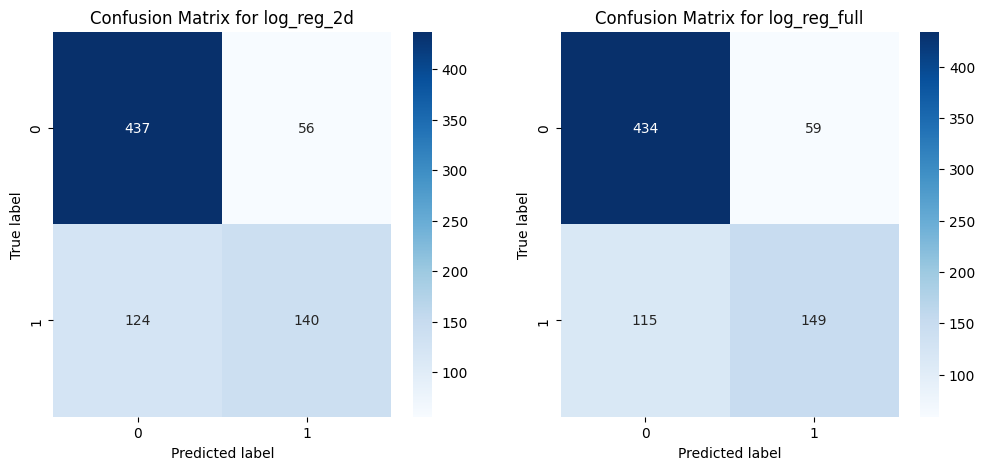

In [10]:
### Visualizing Confusion Matrices

# Build confusion matrices for each model
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

# Visualize the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # figure with two subplots

# Plot heatmap for the first confusion matrix
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix for log_reg_2d')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Plot heatmap for the second confusion matrix
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion Matrix for log_reg_full')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
plt.show();

It’s clear that the confusion matrices differ only slightly in their components. Based on them, we could manually compute the remaining metrics for each model, but we’ll use the built-in functions instead.

**Metric calculation for the `log_reg_2d` model**, trained on two features — *Glucose* and *BMI*:

In [11]:
# Model log_reg_2d:
# Calculate accuracy
print(f'Accuracy: {metrics.accuracy_score(y, y_pred1):.2f}')

# Calculate precision
print(f'Precision: {metrics.precision_score(y, y_pred1):.2f}')

# Calculate recall
print(f'Recall: {metrics.recall_score(y, y_pred1):.2f}')

# Calculate F1 score
print(f'F1 score: {metrics.f1_score(y, y_pred1):.2f}')

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


**Metric calculation for the `log_reg_full` model**, trained on all available features:

In [13]:
# Model log_reg_full:
# Calculate accuracy
print(f'Accuracy: {metrics.accuracy_score(y, y_pred2):.2f}')

# Calculate precision
print(f'Precision: {metrics.precision_score(y, y_pred2):.2f}')

# Calculate recall
print(f'Recall: {metrics.recall_score(y, y_pred2):.2f}')

# Calculate F1 score
print(f'F1 score: {metrics.f1_score(y, y_pred2):.2f}')

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


### Now, let’s compare:

- **Accuracy:** the share of correct answers — for the first model it’s **0.76**, for the second — **0.77**.
- **Precision:** the ability to separate diabetic from healthy patients — **0.71** for the first model, **0.72** for the second.
- **Recall:** the overall ability to find diabetic patients among all patients — **0.53** for the first model, **0.56** for the second.
- **F1:** the harmonic mean of precision and recall — **0.61** for the first model, **0.63** for the second.

> Even if only by a small margin, the second model trained on **all features** outperforms the first model **on every metric**.

For convenience, you can compute all these metrics at once with `classification_report()` from `sklearn.metrics`, which returns a full classification report.

In [14]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



### What’s shown here?

1. The first part of the table shows the metrics **precision**, **recall**, and **f1-score**, calculated for each class separately.  
   The column **support** shows the number of samples for each class.

2. The second part of the table displays the **overall accuracy** metric.

3. Then follows the **macro avg** row — the unweighted average of the metric across both classes 0 and 1.  
   For example, the value in the row `macro avg` and column `recall` is calculated as:  
  $$
  (0.88 + 0.56)/2 = 0.72
    $$

4. The report ends with **weighted avg** — the weighted average of the metric across classes 0 and 1,  
   where the weight is the proportion of samples of each class in the dataset:  
   $$
   score_{weighted\_avg} = \frac{n_{class0}}{n} score_{class0} + \frac{n_{class1}}{n} score_{class1}
   $$  
   where $n_{class0}$ and $n_{class1}$ are the number of observations in each class, and $n$ is the total sample size.

Earlier, we discussed metrics **precision**, **recall**, and **F1** only for class 1 (diabetic patients).  
In the `classification_report()` output, these metrics are calculated for **both classes**. The interpretation remains the same — just swap class 1 for class 0 in your reasoning.

---

### Adjusting the Decision Threshold

Let’s imagine that additional diabetes diagnostics in our clinic are quite expensive. At the same time, we want to identify **as many diabetic patients as possible**.  
In other words, both **precision** and **recall** are important.

Currently, **recall = 0.56**, meaning we correctly identify only 56% of diabetic patients. That’s slightly above half — not great. Can we improve this metric?

By default, in `sklearn`, the classification probability threshold is **0.5**. That is, if a patient’s probability of having diabetes is greater than 0.5,  
the model classifies them as diabetic; otherwise — as healthy.

But what will happen to **recall**, **precision**, and **F1 score** if we adjust this threshold to **0.4**, **0.3**, or **0.6**?  
Let’s explore that next.


> **Note.**  
> Geometrically, adjusting the probability threshold in logistic regression corresponds to **shifting the decision boundary**.

---

We will now predict the probability of having diabetes for each patient in our dataset using the **`log_reg_full`** model. Next, we’ll create     
several different probability thresholds ranging from **0.1 to 1.0** in increments of **0.05**. In a loop, we’ll determine the predicted class     
(0 or 1) for each patient at every threshold value. Finally, we’ll calculate the corresponding performance metrics.

In [29]:
# Calculate diabetes probabilities for each patient
# We’re only interested in the probability of class 1 (the second column)
y_proba_pred = log_reg_full.predict_proba(data.drop('Outcome', axis=1))[:, 1]

# For convenience, wrap the NumPy array into a Pandas Series
y_proba_pred = pd.Series(y_proba_pred)

# Create lists to store metric values
recall_scores = []
precision_scores = []
f1_scores = []

# Generate a set of probability thresholds in the range from 0.1 to 1 with a step of 0.05
thresholds = np.arange(0.1, 1, 0.05)

# Loop through the generated thresholds
for threshold in thresholds:
    # Patients with a diabetes probability > threshold are assigned to class 1
    # Otherwise — to class 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x > threshold else 0)

    # Compute metrics and append them to the lists
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))


Now we have three lists — `recall_scores`, `precision_scores`, and `f1_scores`, which store the metric values for different probability thresholds $p$.

Let’s plot the graphs showing how the metrics depend on the probability threshold:

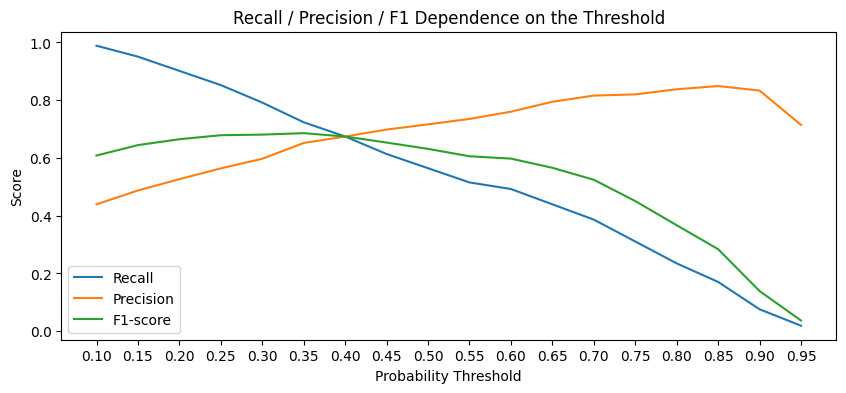

In [31]:
# Visualize the metrics at different threshold values
fig, ax = plt.subplots(figsize=(10, 4))  # figure + coordinate plane

# Plot the line chart showing how recall changes with the threshold
ax.plot(thresholds, recall_scores, label='Recall')

# Plot the line chart showing how precision changes with the threshold
ax.plot(thresholds, precision_scores, label='Precision')

# Plot the line chart showing how F1-score changes with the threshold
ax.plot(thresholds, f1_scores, label='F1-score')

# Add a title and axis labels
ax.set_title('Recall / Precision / F1 Dependence on the Threshold')
ax.set_xlabel('Probability Threshold')
ax.set_ylabel('Score')

# Set tick marks on the x-axis
ax.set_xticks(thresholds)

# Display the legend
ax.legend()
plt.show();


### What do we see on the graph?

As the probability threshold increases, **precision** rises while **recall** decreases.  
It’s easy to see why: as we raise the threshold, we start classifying as diabetic only those patients for whom the model is highly confident — that is,    
we improve precision, but we also exclude some truly sick patients, thereby reducing recall.

At the same time, the **F₁-score** first increases slightly and then steadily decreases.

An interesting point is at **threshold = 0.4**, where all three graphs intersect. This is the point where **precision** and **recall** are equal, and according to the formula, equal to the **F₁-score**.

However, the **maximum F₁-score** is reached at another point — **threshold = 0.35**. At this value, **recall** is higher, while **precision** is slightly lower.

So we face a trade-off: what matters more — precision, recall, or their equality?  
Let’s choose the equality of precision and recall, which occurs at **threshold = 0.4**.

---

### How can we make class predictions with this information?

We will predict the diabetes probability for all patients, then manually assign patients with a probability > 0.4 to class 1 (diabetes),  
and the rest — to class 0 (no diabetes). After that, we’ll calculate the metrics.


In [32]:
# Set the optimal probability threshold
threshold_opt = 0.4

# Assign patients to class 1 (diabetes) if the probability > 0.4,
# otherwise to class 0 (no diabetes)
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

# Compute and display the classification metrics
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



We were able to find a balance between **precision** and **recall** by choosing the optimal probability threshold.

It’s worth noting that in the **data science community**, it’s common practice to tune the threshold value,  
since the default value of 0.5 is not always the most appropriate — the optimal threshold depends on the specific task.

---

## Advantages and Disadvantages of Logistic Regression

Let’s summarize what we’ve discussed and list the main pros and cons of logistic regression.

| 😊 **Advantages** | ☹️ **Disadvantages** |
|------------------|--------------------|
| • A simple, interpretable, yet effective algorithm. Its simplicity and transparency make it very popular in machine learning. | • Works well only when classes are linearly separable, which is rarely the case in real-world data. |
| • Parameter estimation is linear or quadratic (depending on the optimization method), meaning the algorithm is computationally efficient. | • Usually used as a **baseline** model rather than a final one. |
| • Does not require extensive hyperparameter tuning — logistic regression is relatively stable to parameter changes. | |

---

To overcome the limitation of linear separability, we can extend logistic regression by adding **polynomial features**, thus reducing model bias.  
This transforms the separating plane into a **curved decision boundary** of greater complexity.

However, this approach must be applied carefully, as it may lead to **overfitting**.  
Therefore, it’s essential to combine polynomial features with an appropriate **regularization parameter**.


<p align="center">
<img src="Images/l17.png" alt="Size_price_scatter" width="800">
</p>

The figure above illustrates **three different models**:

- The first — a simple logistic regression;  
- The second — a logistic regression trained on **polynomial features of degree 2**;  
- The third — a logistic regression trained on **polynomial features of degree 10**.

We can observe that:

- The **first model** performs poorly and fails to capture the general pattern (it has **high bias**).  
- The **third model**, while perfectly fitting every observation, is **overfitted** and also fails to represent the general trend (it has **high variance**).  
- The **second model** is **optimal**, as it strikes a balance between bias and variance — it doesn’t overfit to individual data points yet captures the overall relationship in the data.
